In [162]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5);
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [163]:
loan_filepath = Path('loan.csv', parse_dates=True)
loans = pd.read_csv(loan_filepath)
loans.head(5)

C:\Users\Karthik\Anaconda37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
loans.shape

(887379, 74)

In [165]:
loans.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [166]:
loans.loc[:,'earliest_cr_line'] = pd.to_datetime(loans.earliest_cr_line)
loans.loc[:,'last_pymnt_d'] = pd.to_datetime(loans.last_pymnt_d)
loans.loc[:,'last_credit_pull_d'] = pd.to_datetime(loans.last_credit_pull_d)

In [167]:
loans['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

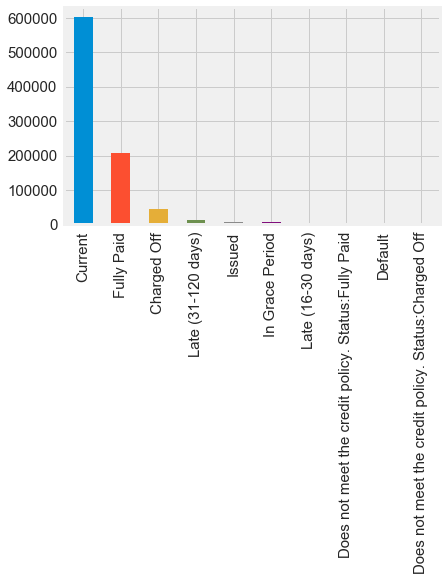

In [47]:
loans.loc[:,'loan_status'].value_counts().plot(kind='bar');

In [60]:
#Get loan Status broken out by Purpose of loan
loans.groupby('purpose')['loan_status'].value_counts()

purpose             loan_status                                        
car                 Current                                                  4937
                    Fully Paid                                               3198
                    Charged Off                                               448
                    Issued                                                     81
                    Late (31-120 days)                                         70
                    Does not meet the credit policy. Status:Fully Paid         51
                    In Grace Period                                            40
                    Late (16-30 days)                                          15
                    Does not meet the credit policy. Status:Charged Off        13
                    Default                                                    10
credit_card         Current                                                149835
                    Fully 

In [169]:
# Number of charged off loans by the total number of fully paid off loans (charge off rate by volume)
(loans.loc[loans['loan_status']=='Charged Off',:].shape[0])/(loans.loc[loans['loan_status']=='Fully Paid',:].shape[0])

0.2178285505216081

In [74]:
loans.groupby('purpose')['loan_status'].agg(['count'])

,count
purpose,
car,8863
credit_card,206182
debt_consolidation,524215
educational,423
home_improvement,51829
house,3707
major_purchase,17277
medical,8540
moving,5414


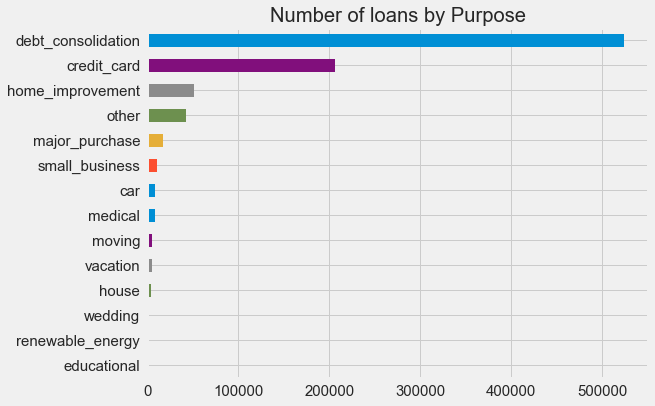

In [174]:
ax = loans.purpose.value_counts().sort_values().plot(kind='barh')
ax.set_title('Number of loans by Purpose');

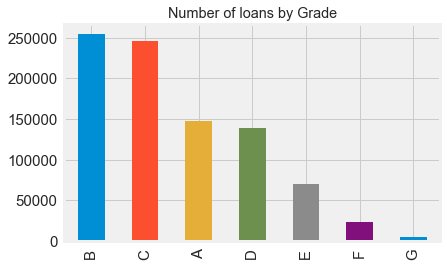

In [160]:
ax = loans.loc[:,'grade'].value_counts().plot(kind='bar');
ax.set_title('Number of loans by Grade');

In [175]:
purpose_dummies = pd.get_dummies(loans.loc[:,'purpose'])
purpose_dummies

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [176]:
loans = pd.concat([loans,purpose_dummies], axis='columns')

In [177]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,0,0,0,0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,0,0,0,0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,0,0,1,0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,1,0,0,0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0,0,0,0,0,1,0,0,0,0


In [178]:
grade_dummies = pd.get_dummies(loans.loc[:,'grade'])
grade_dummies

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0


In [179]:
loans = pd.concat([loans,grade_dummies], axis='columns')

In [180]:
loans['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [181]:
loans.loc[:,'loan_status_num'] = loans.loc[:,'loan_status'].map({'Current':1,'Fully Paid':2,'Charged Off':3})

In [182]:
loans_new = loans.drop(['loan_status','purpose','grade'], axis = 'columns')

In [183]:
loans_new.dtypes

id                                 int64
member_id                          int64
loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                           object
pymnt_plan                        object
url                               object
desc                              object
title                             object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line          datetime64[ns]
inq_last_6mths  

In [184]:
#Build a classification model to analyze historical loans (both successful and charged off)
complete_loans = loans_new.loc[loans.loan_status_num.isin([2.0,3.0]),:]
complete_loans.loan_status_num.value_counts()

2.0    207723
3.0     45248
Name: loan_status_num, dtype: int64

In [185]:
complete_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,vacation,wedding,A,B,C,D,E,F,G,loan_status_num
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,...,0,0,0,1,0,0,0,0,0,2.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,...,0,0,0,0,1,0,0,0,0,3.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,...,0,0,0,0,1,0,0,0,0,2.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,...,0,0,0,0,1,0,0,0,0,2.0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A4,Veolia Transportaton,...,0,1,1,0,0,0,0,0,0,2.0


In [187]:
complete_loans.dtypes

id                                 int64
member_id                          int64
loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                           object
pymnt_plan                        object
url                               object
desc                              object
title                             object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line          datetime64[ns]
inq_last_6mths  

In [199]:
#Build a classification model to predict if a current loan will charge off based on completed loan behavior.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

feature_cols = ['A','B','C','D','E','F','G','car','credit_card','debt_consolidation','educational','home_improvement','house','major_purchase','medical','moving','other','renewable_energy','small_business','vacation','wedding']
X = complete_loans.loc[:, feature_cols]
y = complete_loans.loc[:, 'loan_status_num']

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=99)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.8209287984440966

In [202]:
#y_pred_null = np.ones(y_test.shape) * y_train.mean() > 2.5
#metrics.accuracy_score(y_test, y_pred_null)


In [ ]:
#I plan to use KNN cross-fold validation in addition to Logistic Regression to compare the 2 models.